# **Lab 1.1 Image Representation**

In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Image Color Order with different libraries**
In this part, you will explore how different libraries interpret and display image colors. Specifically, you will compare Matplotlib and OpenCV libraries for image loading and display.

**Load and Display Images:**
   - Load an image using both Matplotlib `plt.imread()` and OpenCV `cv2.imread()` libraries.
   - Display the images side by side using Matplotlib.

**HINT** : `plt.imread()`,`cv2.imread()`,`fig, axs = plt.subplots(1, 2)`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-1.png)


</details>

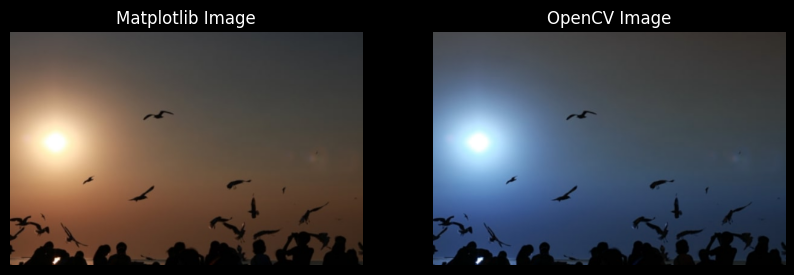

In [2]:
### START CODE HERE ###
picture = "default.jpg"

plt.style.use('dark_background')

mpl_img = plt.imread(picture)
cv_img = cv2.imread(picture)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(mpl_img)
ax1.set_title("Matplotlib Image")
ax1.axis("off")

ax2.imshow(cv_img)
ax2.set_title("OpenCV Image")
ax2.axis("off")

plt.show()
### END CODE HERE ###

### Opencv [BGR] vs Matplotlib [RGB]
Examine the grayscale representations of individual color channels for each library.
***PLEASE use direct slicing method***

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-2.png)

</details>

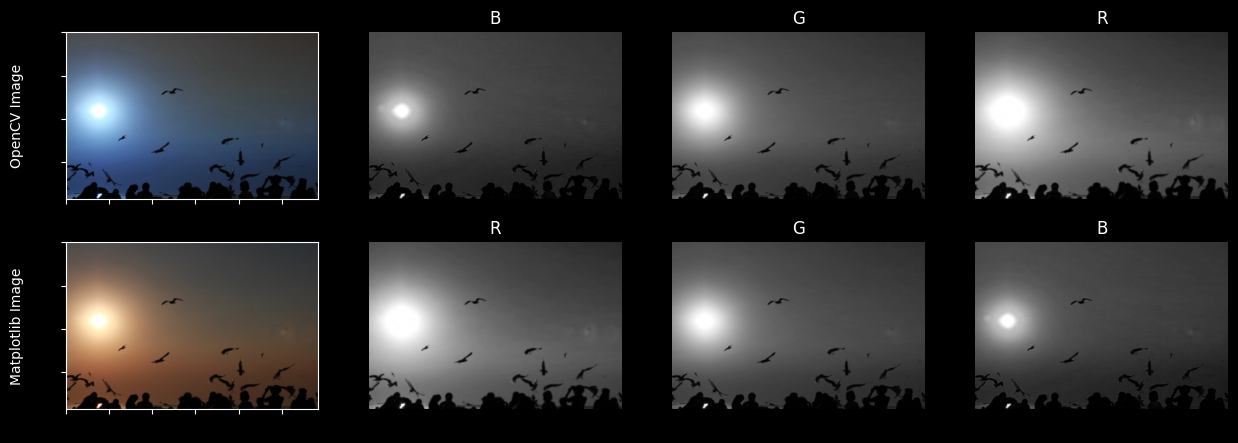

In [3]:
### START CODE HERE ###
fig, axs = plt.subplots(2, 4, figsize=(15, 5))

color_channel = ["R", "G", "B"]

for row in range(0, 2):
    for col in range(0, 4):
        ax = axs[row, col]
        ax.tick_params(labelcolor='black')
        if row == 0:
            ax.imshow(cv_img)
            if col == 0: ax.set_ylabel("OpenCV Image")
            else:
                ax.imshow(cv_img[:, :, col-1], cmap='gray')
                ax.set_title(color_channel[col*-1])
                ax.axis("off")
        else:
            ax.imshow(mpl_img)
            if col == 0: ax.set_ylabel("Matplotlib Image")
            else:
                ax.imshow(mpl_img[:, :, col-1], cmap='gray')
                ax.set_title(color_channel[col-1])
                ax.axis("off")
        

plt.show()
### END CODE HERE ###

##### Opencv BGR -> RGB
Compare the images displayed after conversion using both methods (`cv2.cvtColor()` and `direct slicing`).

Use `cv2.cvtColor()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-3.png)

</details>

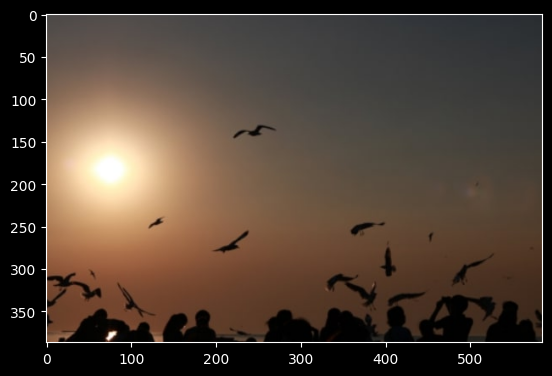

In [4]:
### START CODE HERE ###
converted_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1)
ax.imshow(converted_img)

plt.show()
### END CODE HERE ###

Use `direct slicing method (array[...])`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-4.png)

</details>

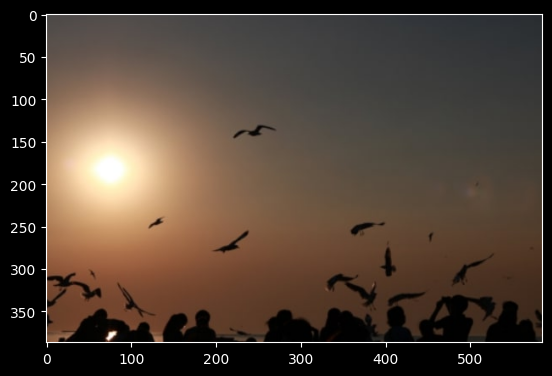

In [5]:
### START CODE HERE ###
converted_img = cv_img[:, :, ::-1]

fig, ax = plt.subplots(1, 1)
ax.imshow(converted_img)

plt.show()
### END CODE HERE ###

## **Image Reshape**

Implement the code to tranform the image from ***channels last (HWC) to channels first (CHW)***.<br>

**NumPy Transpose**<br>
Compare the difference between :
- `np.transpose(<img>)`
- `np.transpose(<img>,(2,0,1))`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
np.transpose(mpl_img) => Before : (3265, 4898, 3) | After : (3, 4898, 3265)
np.transpose(mpl_img,(2,0,1)) => Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-5.png)

</details>

np.transpose(mpl_img) => Before : (387, 585, 3) | After : (3, 585, 387)
np.transpose(mpl_img,(2,0,1)) => Before : (387, 585, 3) | After : (3, 387, 585)


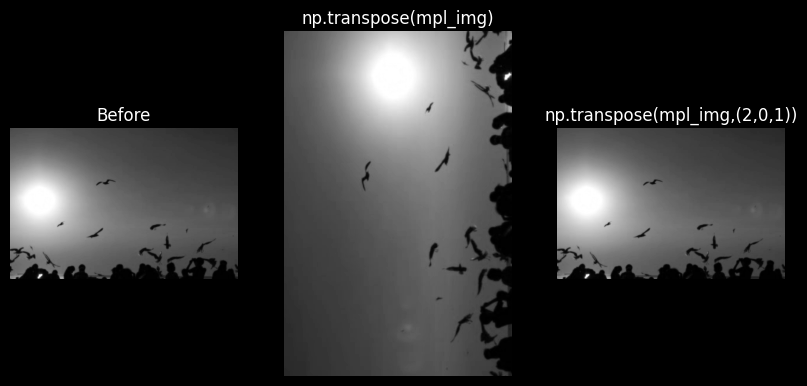

In [6]:
### START CODE HERE ###

reshaped_trade_trans = np.transpose(mpl_img)
print('np.transpose(mpl_img) => Before :',mpl_img.shape,'| After :',reshaped_trade_trans.shape)


reshaped_trans = np.transpose(mpl_img, (2,0,1))
print('np.transpose(mpl_img,(2,0,1)) => Before :',mpl_img.shape,'| After :',reshaped_trans.shape)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(mpl_img[:, :, 0], cmap="gray")
axs[0].set_title("Before")
axs[0].set_axis_off()

axs[1].imshow(reshaped_trade_trans[0, :, :], cmap="gray")
axs[1].set_title("np.transpose(mpl_img)")
axs[1].set_axis_off()

axs[2].imshow(reshaped_trans[0, :, :], cmap="gray")
axs[2].set_title("np.transpose(mpl_img,(2,0,1))")
axs[2].set_axis_off()

plt.show()

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [7]:
assert reshaped_trade_trans.shape == (mpl_img.shape[2], mpl_img.shape[1], mpl_img.shape[0]), \
    f"Error: Shape mismatch after traditional transpose. Expected {(mpl_img.shape[1], mpl_img.shape[0], mpl_img.shape[2])}, got {reshaped_trade_trans.shape}"
print("Assertion for traditional transpose passed successfully.")

assert reshaped_trans.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after specified transpose. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_trans.shape}"
print("Assertion for specified transpose passed successfully.")

Assertion for traditional transpose passed successfully.
Assertion for specified transpose passed successfully.


**NumPy Reshape**

Use `np.reshape()`. Ensure the new shape is (3, height, width).
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-6.png)

</details>

Before : (387, 585, 3) | After : (3, 387, 585)


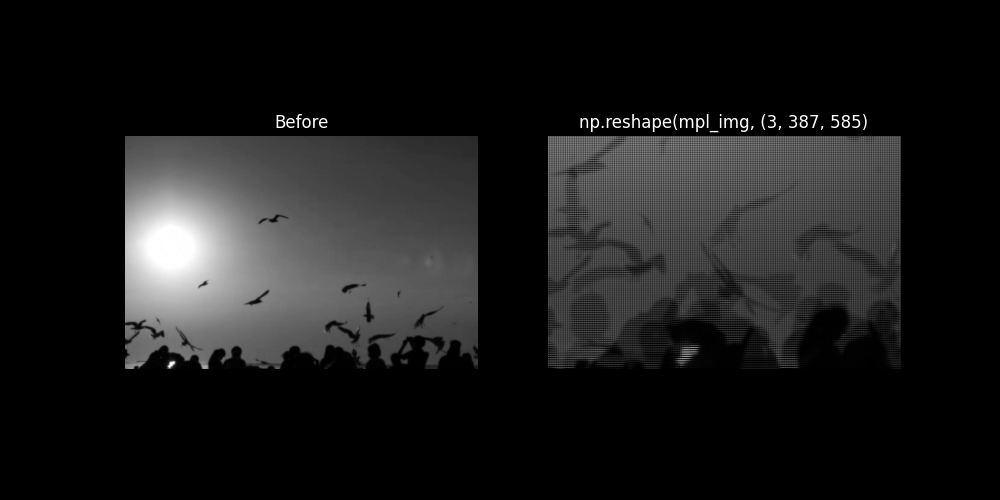

In [22]:
### START CODE HERE ###
h, w, c = mpl_img.shape
reshaped_reshape = np.reshape(mpl_img, (3, h, w))
print('Before :',mpl_img.shape,'| After :',reshaped_reshape.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(mpl_img[:, :, 0], cmap="gray")
axs[0].set_title("Before")
axs[0].set_axis_off()

axs[1].imshow(reshaped_reshape[2, :, :], cmap="gray")
axs[1].set_title(f"np.reshape(mpl_img, (3, {h}, {w})")
axs[1].set_axis_off()

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [9]:
assert reshaped_reshape.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after reshape. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_reshape.shape}"
print("Assertion for reshape passed successfully.")

Assertion for reshape passed successfully.


**NumPy moveaxis**

Use `np.moveaxis` to move the channels axis from the last position to the first.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-7.png)

</details>

Before : (387, 585, 3) | After : (3, 387, 585)


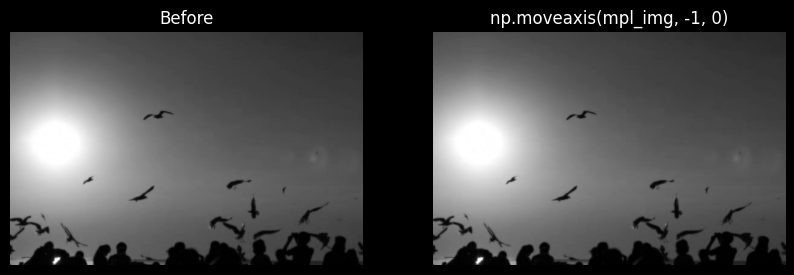

In [10]:
### START CODE HERE ###
reshaped_mvx = np.moveaxis(mpl_img, -1, 0)
print('Before :',mpl_img.shape,'| After :',reshaped_mvx.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(mpl_img[:, :, 0], cmap="gray")
axs[0].set_title("Before")
axs[0].set_axis_off()

axs[1].imshow(reshaped_mvx[0, :, :], cmap="gray")
axs[1].set_title("np.moveaxis(mpl_img, -1, 0)")
axs[1].set_axis_off()

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [11]:
assert reshaped_mvx.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after np.moveaxis. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_mvx.shape}"
print("Assertion for np.moveaxis passed successfully.")

Assertion for np.moveaxis passed successfully.


## **Reduce Bit Depth using Quantization**
In this part, you will explore how to reduce the bit depth of an image using quantization. Quantization is a technique used to map pixel values from a continuous range to a smaller set of discrete values, effectively reducing the number of bits used to represent each pixel.
$$
\begin{align*}
Q_{level} &= 2^{bit dept-1}\\
Q &= floor(NormValue(S_i) * Q_{level})\\
Q &= floor((\frac{S_i-S_{min}}{S_{max}-S_{min}})*Q_{level})
\end{align*}
$$

Please complete the function below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-8.png)

</details>

In [12]:
### START CODE HERE ###
def quantize(img, bit_dept):
    quantized_img = img.copy()
    
    Qlevel = pow(2, bit_dept - 1)
    Smax = 255

    quantized_img = np.floor((img.astype(np.float32) / Smax) * Qlevel)
            
    return quantized_img

### END CODE HERE ###

[[586. 586. 586. ... 361. 361. 353.]
 [586. 586. 586. ... 361. 361. 353.]
 [586. 586. 586. ... 361. 361. 361.]
 ...
 [722. 698. 714. ... 216. 192. 216.]
 [586. 594. 658. ... 216. 208. 224.]
 [329. 369. 505. ... 224. 240. 232.]]


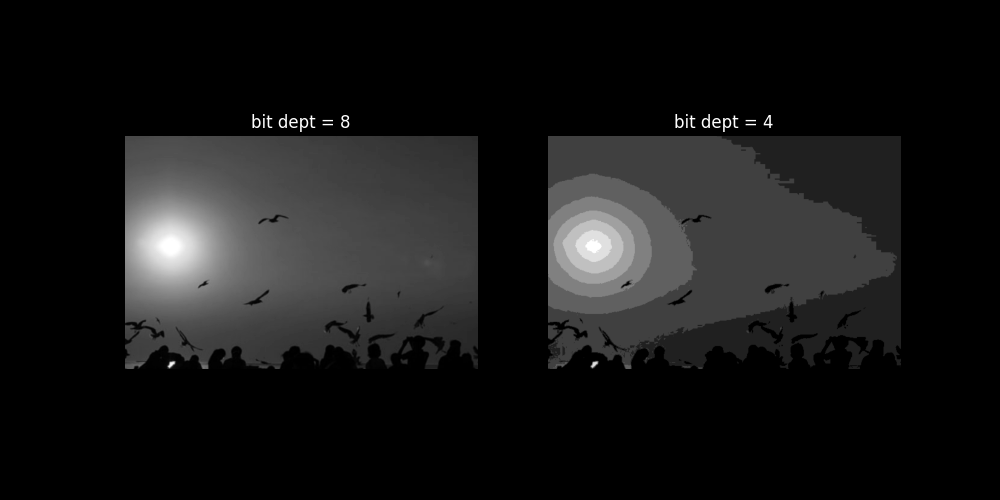

In [20]:
### START CODE HERE ###
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)
bd8 = quantize(gray_img, 12)
bd4 = quantize(gray_img, 4)

print(bd8)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(bd8, cmap="gray")
axs[0].set_title("bit dept = 8")
axs[0].set_axis_off()

axs[1].imshow(bd4, cmap="gray")
axs[1].set_title("bit dept = 4")
axs[1].set_axis_off()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [14]:
max_value_bd8 = 2**8 - 1
max_value_bd4 = 2**4 - 1

assert np.min(bd8) >= 0 and np.max(bd8) <= max_value_bd8, \
    f"Error: Values in bd8 are out of expected range 0-{max_value_bd8}. Got min={np.min(bd8)}, max={np.max(bd8)}"
assert np.min(bd4) >= 0 and np.max(bd4) <= max_value_bd4, \
    f"Error: Values in bd4 are out of expected range 0-{max_value_bd4}. Got min={np.min(bd4)}, max={np.max(bd4)}"


## **3D Image Surface**

use `plot_surface()` to plot the image in 3D space, where the z-axis represents the normalized pixel intensity values.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![3d-surface.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/3d-surface.gif)

</details>

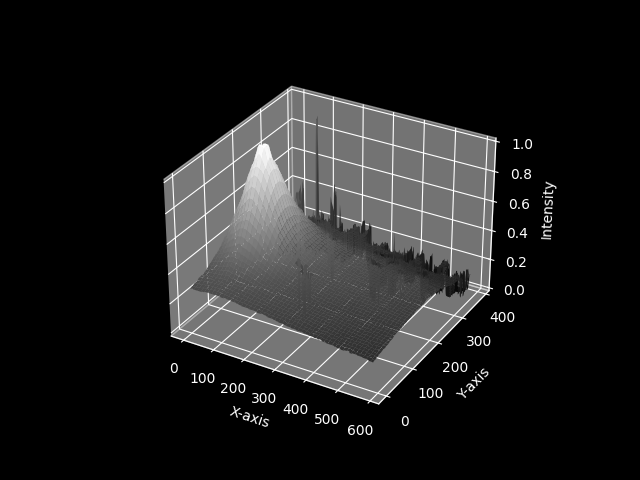

In [15]:
%matplotlib ipympl 
### START CODE HERE ###
cv_img_gray = cv2.cvtColor(cv_img, code=cv2.COLOR_RGB2GRAY)



cv_img_gray = cv_img_gray.astype(np.float32) / 255

h, w = cv_img_gray.shape
X, Y = np.meshgrid(np.arange(w), np.arange(h))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor("black")

ax.plot_surface(X, Y, cv_img_gray, cmap="gray", edgecolor='none')

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Intensity")

plt.show()
### END CODE HERE ###


---

## **Question**
1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?
2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?
3. Why does np.reshape destroy the image integrity?

1. เนื่องจาก cv_img มี shape เป็น (h, w, c) โดย channel เป็น BGR ดังนั้น
ใช้ cv_img[:, :, ::-1] เป็นการนำเอา height, width มาทั้งรูป และ ::-1 เป็นการ reverse channel 

cv_img.shape : (387, 585, 3)


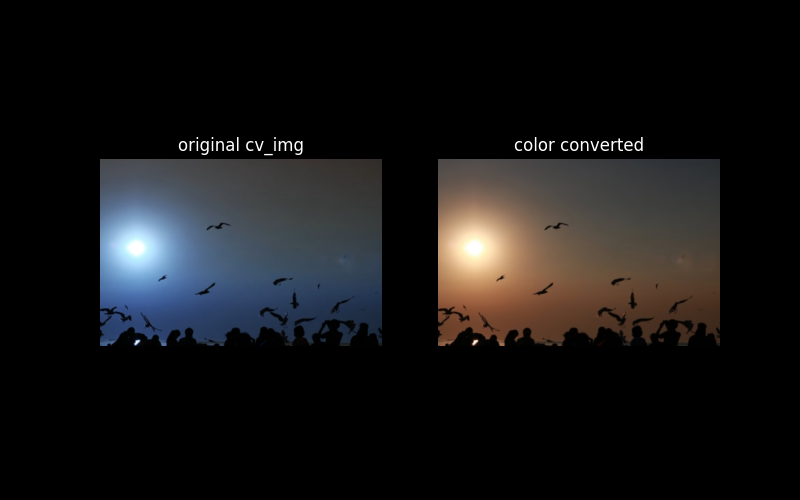

In [16]:
print(f"cv_img.shape : {cv_img.shape}")
converted_img = cv_img[:, :, ::-1]

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(cv_img)
axs[0].set_title("original cv_img")
axs[0].set_axis_off()

axs[1].imshow(converted_img)
axs[1].set_title("color converted")
axs[1].set_axis_off()

plt.show()

2. ทำได้โดยการสร้าง array ขึ้นมาใหม่ให้เป็น CHW โดยมี shape เป็น (3, h, w) แล้วนำแต่ละ channel ในรูปเดิมซึ่งเป็น HWC มาแทนที่แต่ละ channel ใน array ใหม่

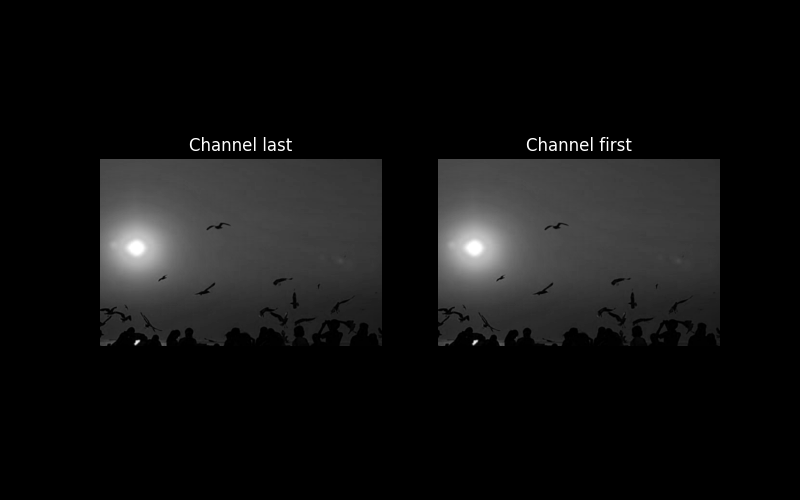

In [17]:
h, w = cv_img.shape[:2]

converted_img = np.zeros((3, h, w))

converted_img[0, :, :] = cv_img[:, :, 0]
converted_img[1, :, :] = cv_img[:, :, 1]
converted_img[2, :, :] = cv_img[:, :, 2]

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

axs[0].imshow(cv_img[:, :, 0], cmap="gray")
axs[0].set_title("Channel last")
axs[0].set_axis_off()

axs[1].imshow(converted_img[0, :, :], cmap="gray")
axs[1].set_title("Channel first")
axs[1].set_axis_off()

plt.show()

3. ถ้า กำหนด shape อันใหม่ ไม่สัมพันธ์กับ shape อันเดิม จะทำให้ลำดับของข้อมูลผิดแล้วทำให้ภาพเพื้ยนได้เพราะ reshape จะเอาข้อมูลไป flatten แล้วทำ shape ขึ้นมาใหม่

In [18]:
print("original mpl_img")
print(cv_img[:2, :2, :])

# reshaped_flatten = np.reshape(mpl_img.flatten(), (3, h, w))
# print("\nreshaped flatten")
# print(reshaped_flatten[:, :2, :2])

print("\nflatten")
print(mpl_img.flatten())

print("\nreshaped mpl_img")
print(reshaped_reshape[:, :2, :2])

original mpl_img
[[[71 73 74]
  [71 73 74]]

 [[71 73 74]
  [71 73 74]]]

flatten
[74 73 71 ... 30 31 26]

reshaped mpl_img
[[[ 74  73]
  [ 70  68]]

 [[160 123]
  [125 102]]

 [[165 115]
  [151 102]]]
